In [0]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.getcwd()
os.chdir('/content/drive/My Drive/deep-learning/day29/')

In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

"""
Q1. Code Challenge

 Time Series using RNN with Keras
 This is Multivariate Time Series data.
 
 In this project, we will need to do Google stock prediction using time series. We will
  use Keras and Recurrent Neural Network(RNN).
 
 Donwnload the Google stock prices for past 10 years from https://www.nasdaq.com/symbol/goog/historical to a 
 csv file Google2014to2019.csv

and import the basic libraries and read the data from the CSV file.

Take the average of the low and high of the Google stock for the day and volume of the stocks traded for 
the day as input features to predict the stock prices.

We will be creating the data that will go back to 30 business days in past for the prediction.

Also, we will take 30% of the latest data as our test dataset.

For RNN LSTM to predict the data we need to convert the input data.

Input data is in the form: [Volume of stocks traded, Average stock price] and we need to create a time series data.

The time series data for today should contain the [Volume of stocks traded, Average stock price] for past 
50 days and the target variable will be Google’s stock price today and so on.
"""



In [0]:
dataset=pd.read_csv('google_training.csv')
dataset.head()

In [0]:
#Take the average of the low and high of the Google stock for the day and volume of the stocks traded for 
#the day as input features to predict the stock prices.
dataset=dataset.iloc[:,[2,4,5]]
dataset.head()

In [0]:
dataset['avg'] = dataset.iloc[:,1:2].mean(axis=1)



In [0]:
#first and last column is feaures and in first column treat like labels and features

privous_data=dataset.iloc[:-33,[0,3]]
latest_data=dataset.iloc[-30:,[0,3]]
training_data=dataset.iloc[:-33,[0,3]].values
test_data=dataset.iloc[-30:,[0,3]].values

In [0]:
scaler = MinMaxScaler(feature_range = (0, 1))
training_data=scaler.fit_transform(training_data)


In [0]:
#now we take 30 data for test purpose and 1300 data for trainig purpose
#lets take 20 one feature and 1 labels

features=[]
labels=[]

for i in range(20,len(training_data)):
    features.append(training_data[i-20:i,0:2])
    labels.append(training_data[i,0])
    

In [0]:
features,labels=np.array(features),np.array(labels)


In [0]:
labels.shape
#labels should always be total-i 
features.shape
#we havle alreday feature in 3d dim
#here timestamp is 20 and ,data-dim=2

In [13]:
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import LSTM  
from keras.layers import Dropout

Using TensorFlow backend.


In [0]:
model=Sequential()

In [0]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features.shape[1], 2)))  


In [0]:
model.add(Dropout(0.2))  


In [0]:
model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50))  
model.add(Dropout(0.2))  
#here retun sequence false we will not add any 

In [0]:
model.summary()

In [0]:
model.add(Dense(units = 1))  
#output layer only here unit=1 because this is a regression problem so no any function use of output node and 1 node for regression output


In [0]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')  


In [0]:
model.fit(features, labels, epochs = 100, batch_size = 32)  


In [0]:
#i don't have test file so i am directly use training data last

total_data=pd.concat([privous_data,latest_data],axis=0)

#total data now become 1330 
#previous_data=1300
#for prediction 30 days data
#total_data.head()

In [0]:
#prediction on 30 days add previous 20 days data
test_inputs = total_data[-50:].values 


In [0]:
test_inputs=scaler.transform(test_inputs)
#len(test_inputs)

In [0]:
test_features = []  
test_labels=[]

for j in range(20,len(test_inputs)):
    test_features.append(test_inputs[j-20:j,0:2])
    test_labels.append(test_inputs[j,0])

In [0]:
test_features,test_labels=np.array(test_features),np.array(test_labels)

In [128]:
test_features.shape


(30, 20, 2)

In [0]:
prediction=model.predict(test_features)

In [130]:

test_labels=test_labels.reshape(-1,1)
test_labels.shape

(30, 1)

In [131]:
prediction=prediction.reshape(-1,1)
prediction.shape

(30, 1)

In [0]:


import matplotlib.pyplot as plt



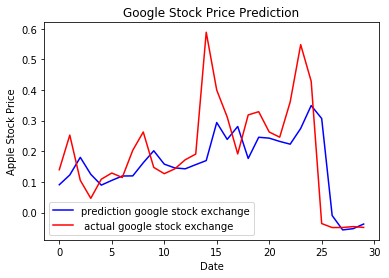

In [137]:


plt.plot(prediction,label='prediction google stock exchange',color='blue')
plt.plot(test_labels,label=' actual google stock exchange',color='red')
plt.title('Google Stock Price Prediction')  
plt.xlabel('Date')  
plt.ylabel('Apple Stock Price')  
plt.legend()  
plt.show()